# Extract data from Cowrie Logs 

In [1]:
import pandas as pd
import numpy as np
import json
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 35

import warnings
warnings.filterwarnings('ignore')

In [2]:
cow_1 = pd.read_json('input/cowrie.json.2017_7_4', lines=True)
# cow_2 = pd.read_json('input/cowrie.json.2017_7_5', lines=True)
cow_3 = pd.read_json('input/cowrie.json.2017_7_6', lines=True)
cow_4 = pd.read_json('input/cowrie.json.2017_7_7', lines=True)

In [3]:
cow = pd.concat([cow_1, cow_3, cow_4])

print ('Data Shape : '+str(cow.shape))
del cow_1, cow_3, cow_4

Data Shape : (1058090, 30)


In [4]:
cow.head()

,compCS,data,dst_ip,dst_port,duration,encCS,eventid,height,input,isError,kexAlgs,keyAlgs,macCS,message,outfile,password,realm,sensor,session,shasum,size,src_ip,src_port,system,timestamp,ttylog,url,username,version,width
0,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,NaN,NaN,NaN,New connection: 116.31.116.16:39547 (10.10.0.1...,NaN,NaN,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,39547.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:07.569246,NaN,NaN,NaN,NaN,NaN
1,[none],NaN,NaN,NaN,NaN,"[aes128-ctr, aes192-ctr, aes256-ctr, aes256-cb...",cowrie.client.version,NaN,NaN,0.0,"[diffie-hellman-group14-sha1, diffie-hellman-g...","[ssh-rsa, ssh-dss]","[hmac-sha1, hmac-sha1-96, hmac-md5, hmac-md5-9...",Remote SSH version: SSH-2.0-PUTTY,NaN,NaN,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:08.235671,NaN,NaN,NaN,SSH-2.0-PUTTY,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,cowrie.login.success,NaN,NaN,0.0,NaN,NaN,NaN,login attempt [root/windows98] succeeded,NaN,windows98,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,NaN,SSHService 'ssh-userauth' on HoneyPotSSHTransp...,2017-07-03 18:30:10.585142,NaN,NaN,root,NaN,NaN
3,NaN,NaN,NaN,NaN,9.96463,NaN,cowrie.session.closed,NaN,NaN,0.0,NaN,NaN,NaN,Connection lost after 9 seconds,NaN,NaN,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:17.902600,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,NaN,NaN,NaN,New connection: 116.31.116.16:22040 (10.10.0.1...,NaN,NaN,NaN,DC-NIC-Mumbai,e95d1a25184c,NaN,NaN,116.31.116.16,22040.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:44.657703,NaN,NaN,NaN,NaN,NaN


<h3>Cowrie Command Input</h3>
<br>
<table>
    <tr>
        <th>Commands</th>
        <th>Event ID</th>
    </tr>
    <tr>
        <td>rm</td>
        <td>cowrie.command.input/delete</td>
    </tr>
    <tr>
        <td>nano, gedit, cp, mv, mkdir</td>
        <td>cowrie.command.input/write</td>
    </tr>
    <tr>
        <td>sudo, cd, pwd, ls</td>
        <td>cowrie.command.input/dir_sudo</td>
    </tr>
    <tr>
        <td>free, uname, history, df, du, top, lsb_release</td>
        <td>cowrie.command.input/system</td>
    </tr>
    <tr>
        <td>adduser, passwd</td>
        <td>cowrie.command.input/adduser</td>
    </tr>
</table>

In [5]:
def find_inp_type(eventid, inp):
    if eventid != "cowrie.command.input":
        return eventid
    if inp.find("rm")!=-1:
        return "cowrie.command.input/delete"
    if inp.find("nano")!=-1 or inp.find("gedit")!=-1 or inp.find("cp")!=-1 or inp.find("mv")!=-1 or inp.find("mkdir")!=-1:
        return "cowrie.command.input/write"
    if inp.find("sudo")!=-1 or inp.find("cd")!=-1 or inp.find("pwd")!=-1 or inp.find("ls")!=-1:
        return "cowrie.command.input/dir_sudo"
    if inp.find("free")!=-1 or inp.find("uname")!=-1 or inp.find("history")!=-1 or inp.find("df")!=-1 or inp.find("du")!=-1 or inp.find("top")!=-1 or inp.find("lsb_release")!=-1:
        return "cowrie.command.input/system"
    if inp.find("adduser")!=-1 or inp.find("passwd")!=-1:
        return "cowrie.command.input/adduser"
    return "cowrie.command.input/other"

In [6]:
cow['eventid_new'] = cow.apply(lambda x: find_inp_type(x['eventid'], x['input']), axis=1)

In [7]:
cow.head()

,compCS,data,dst_ip,dst_port,duration,encCS,eventid,height,input,isError,kexAlgs,keyAlgs,macCS,message,outfile,password,realm,sensor,session,shasum,size,src_ip,src_port,system,timestamp,ttylog,url,username,version,width,eventid_new
0,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,NaN,NaN,NaN,New connection: 116.31.116.16:39547 (10.10.0.1...,NaN,NaN,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,39547.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:07.569246,NaN,NaN,NaN,NaN,NaN,cowrie.session.connect
1,[none],NaN,NaN,NaN,NaN,"[aes128-ctr, aes192-ctr, aes256-ctr, aes256-cb...",cowrie.client.version,NaN,NaN,0.0,"[diffie-hellman-group14-sha1, diffie-hellman-g...","[ssh-rsa, ssh-dss]","[hmac-sha1, hmac-sha1-96, hmac-md5, hmac-md5-9...",Remote SSH version: SSH-2.0-PUTTY,NaN,NaN,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:08.235671,NaN,NaN,NaN,SSH-2.0-PUTTY,NaN,cowrie.client.version
2,NaN,NaN,NaN,NaN,NaN,NaN,cowrie.login.success,NaN,NaN,0.0,NaN,NaN,NaN,login attempt [root/windows98] succeeded,NaN,windows98,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,NaN,SSHService 'ssh-userauth' on HoneyPotSSHTransp...,2017-07-03 18:30:10.585142,NaN,NaN,root,NaN,NaN,cowrie.login.success
3,NaN,NaN,NaN,NaN,9.96463,NaN,cowrie.session.closed,NaN,NaN,0.0,NaN,NaN,NaN,Connection lost after 9 seconds,NaN,NaN,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:17.902600,NaN,NaN,NaN,NaN,NaN,cowrie.session.closed
4,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,NaN,NaN,NaN,New connection: 116.31.116.16:22040 (10.10.0.1...,NaN,NaN,NaN,DC-NIC-Mumbai,e95d1a25184c,NaN,NaN,116.31.116.16,22040.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:44.657703,NaN,NaN,NaN,NaN,NaN,cowrie.session.connect


### Input Events

In [8]:
cow_inp1 = cow[cow['eventid_new'] == "cowrie.command.input/other"]
cow_inp2 = cow[cow['eventid_new'] == "cowrie.command.input/delete"]
cow_inp3 = cow[cow['eventid_new'] == "cowrie.command.input/write"]
cow_inp4 = cow[cow['eventid_new'] == "cowrie.command.input/dir_sudo"]
cow_inp5 = cow[cow['eventid_new'] == "cowrie.command.input/system"]
cow_inp6 = cow[cow['eventid_new'] == "cowrie.command.input/adduser"]

In [9]:
cow_inp = pd.concat([cow_inp1, cow_inp2, cow_inp3, cow_inp4, cow_inp5, cow_inp6])
cow_inp.head()

,compCS,data,dst_ip,dst_port,duration,encCS,eventid,height,input,isError,kexAlgs,keyAlgs,macCS,message,outfile,password,realm,sensor,session,shasum,size,src_ip,src_port,system,timestamp,ttylog,url,username,version,width,eventid_new
34,NaN,NaN,NaN,NaN,NaN,NaN,cowrie.command.input,NaN,enable,0.0,NaN,NaN,NaN,CMD: enable,NaN,NaN,NaN,DC-NIC-Mumbai,274c501ed69f,NaN,NaN,190.236.71.103,NaN,"CowrieTelnetTransport,1253,190.236.71.103",2017-07-03 18:31:52.781232,NaN,NaN,NaN,NaN,NaN,cowrie.command.input/other
36,NaN,NaN,NaN,NaN,NaN,NaN,cowrie.command.input,NaN,system,0.0,NaN,NaN,NaN,CMD: system,NaN,NaN,NaN,DC-NIC-Mumbai,274c501ed69f,NaN,NaN,190.236.71.103,NaN,"CowrieTelnetTransport,1253,190.236.71.103",2017-07-03 18:31:53.342628,NaN,NaN,NaN,NaN,NaN,cowrie.command.input/other
38,NaN,NaN,NaN,NaN,NaN,NaN,cowrie.command.input,NaN,shell,0.0,NaN,NaN,NaN,CMD: shell,NaN,NaN,NaN,DC-NIC-Mumbai,274c501ed69f,NaN,NaN,190.236.71.103,NaN,"CowrieTelnetTransport,1253,190.236.71.103",2017-07-03 18:31:53.740772,NaN,NaN,NaN,NaN,NaN,cowrie.command.input/other
40,NaN,NaN,NaN,NaN,NaN,NaN,cowrie.command.input,NaN,sh,0.0,NaN,NaN,NaN,CMD: sh,NaN,NaN,NaN,DC-NIC-Mumbai,274c501ed69f,NaN,NaN,190.236.71.103,NaN,"CowrieTelnetTransport,1253,190.236.71.103",2017-07-03 18:31:54.161944,NaN,NaN,NaN,NaN,NaN,cowrie.command.input/other
43,NaN,NaN,NaN,NaN,NaN,NaN,cowrie.command.input,NaN,/bin/busybox wget; /bin/busybox 81c46036wget;...,0.0,NaN,NaN,NaN,CMD: /bin/busybox wget; /bin/busybox 81c46036...,NaN,NaN,NaN,DC-NIC-Mumbai,274c501ed69f,NaN,NaN,190.236.71.103,NaN,"CowrieTelnetTransport,1253,190.236.71.103",2017-07-03 18:31:54.723865,NaN,NaN,NaN,NaN,NaN,cowrie.command.input/other


In [10]:
cow_inp['Inputs'] = cow_inp['eventid_new']

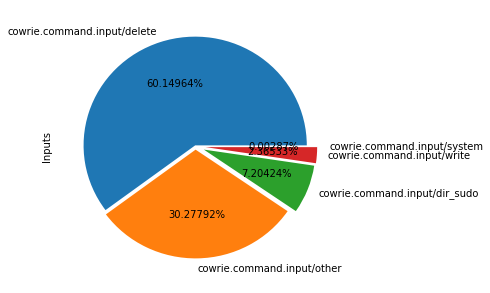

In [11]:
cow_inp['Inputs'].value_counts().plot(kind='pie', figsize=(5, 5), autopct='%1.5f%%', 
                                      explode=(0.01, 0.03, 0.08, 0.09, 0.1))

### Unique Event IDs

In [7]:
cow['eventid_new'].unique()

array(['cowrie.session.connect', 'cowrie.client.version',
       'cowrie.login.success', 'cowrie.session.closed',
       'cowrie.login.failed', 'cowrie.log.closed',
       'cowrie.direct-tcpip.request', 'cowrie.log.open',
       'cowrie.command.input/other', 'cowrie.command.success',
       'cowrie.command.failed', 'cowrie.command.input/delete',
       'cowrie.command.input/dir_sudo', 'cowrie.command.input/write',
       'cowrie.direct-tcpip.data', 'cowrie.client.size',
       'cowrie.session.file_download', 'cowrie.command.input/system',
       'cowrie.session.input'], dtype=object)

In [11]:
cow['eventid'] = cow['eventid_new']
cow.head()

,compCS,data,dst_ip,dst_port,duration,encCS,eventid,height,input,isError,kexAlgs,keyAlgs,macCS,message,outfile,password,realm,sensor,session,shasum,size,src_ip,src_port,system,timestamp,ttylog,url,username,version,width,eventid_new
0,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,NaN,NaN,NaN,New connection: 116.31.116.16:39547 (10.10.0.1...,NaN,NaN,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,39547.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:07.569246,NaN,NaN,NaN,NaN,NaN,cowrie.session.connect
1,[none],NaN,NaN,NaN,NaN,"[aes128-ctr, aes192-ctr, aes256-ctr, aes256-cb...",cowrie.client.version,NaN,NaN,0.0,"[diffie-hellman-group14-sha1, diffie-hellman-g...","[ssh-rsa, ssh-dss]","[hmac-sha1, hmac-sha1-96, hmac-md5, hmac-md5-9...",Remote SSH version: SSH-2.0-PUTTY,NaN,NaN,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:08.235671,NaN,NaN,NaN,SSH-2.0-PUTTY,NaN,cowrie.client.version
2,NaN,NaN,NaN,NaN,NaN,NaN,cowrie.login.success,NaN,NaN,0.0,NaN,NaN,NaN,login attempt [root/windows98] succeeded,NaN,windows98,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,NaN,SSHService 'ssh-userauth' on HoneyPotSSHTransp...,2017-07-03 18:30:10.585142,NaN,NaN,root,NaN,NaN,cowrie.login.success
3,NaN,NaN,NaN,NaN,9.96463,NaN,cowrie.session.closed,NaN,NaN,0.0,NaN,NaN,NaN,Connection lost after 9 seconds,NaN,NaN,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:17.902600,NaN,NaN,NaN,NaN,NaN,cowrie.session.closed
4,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,NaN,NaN,NaN,New connection: 116.31.116.16:22040 (10.10.0.1...,NaN,NaN,NaN,DC-NIC-Mumbai,e95d1a25184c,NaN,NaN,116.31.116.16,22040.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:44.657703,NaN,NaN,NaN,NaN,NaN,cowrie.session.connect


### Label Encoder

In [12]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

In [13]:
enc.fit_transform(cow['eventid_new'].unique())

array([16,  1, 14, 15, 13, 11, 10, 12,  5,  8,  2,  3,  4,  7,  9,  0, 17,
        6, 18])

In [14]:
cow['eventid_new'] = enc.fit_transform(cow['eventid_new'])

In [12]:
enc.classes_

array(['cowrie.client.size', 'cowrie.client.version',
       'cowrie.command.failed', 'cowrie.command.input/delete',
       'cowrie.command.input/dir_sudo', 'cowrie.command.input/other',
       'cowrie.command.input/system', 'cowrie.command.input/write',
       'cowrie.command.success', 'cowrie.direct-tcpip.data',
       'cowrie.direct-tcpip.request', 'cowrie.log.closed',
       'cowrie.log.open', 'cowrie.login.failed', 'cowrie.login.success',
       'cowrie.session.closed', 'cowrie.session.connect',
       'cowrie.session.file_download', 'cowrie.session.input'],
      dtype=object)

In [ ]:
cow['eventid'].unique()

In [15]:
cow.head(5)

,compCS,data,dst_ip,dst_port,duration,encCS,eventid,height,input,isError,kexAlgs,keyAlgs,macCS,message,outfile,password,realm,sensor,session,shasum,size,src_ip,src_port,system,timestamp,ttylog,url,username,version,width,eventid_new
0,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,NaN,NaN,NaN,New connection: 116.31.116.16:39547 (10.10.0.1...,NaN,NaN,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,39547.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:07.569246,NaN,NaN,NaN,NaN,NaN,16
1,[none],NaN,NaN,NaN,NaN,"[aes128-ctr, aes192-ctr, aes256-ctr, aes256-cb...",cowrie.client.version,NaN,NaN,0.0,"[diffie-hellman-group14-sha1, diffie-hellman-g...","[ssh-rsa, ssh-dss]","[hmac-sha1, hmac-sha1-96, hmac-md5, hmac-md5-9...",Remote SSH version: SSH-2.0-PUTTY,NaN,NaN,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:08.235671,NaN,NaN,NaN,SSH-2.0-PUTTY,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,cowrie.login.success,NaN,NaN,0.0,NaN,NaN,NaN,login attempt [root/windows98] succeeded,NaN,windows98,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,NaN,SSHService 'ssh-userauth' on HoneyPotSSHTransp...,2017-07-03 18:30:10.585142,NaN,NaN,root,NaN,NaN,14
3,NaN,NaN,NaN,NaN,9.96463,NaN,cowrie.session.closed,NaN,NaN,0.0,NaN,NaN,NaN,Connection lost after 9 seconds,NaN,NaN,NaN,DC-NIC-Mumbai,577076dfb79e,NaN,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:17.902600,NaN,NaN,NaN,NaN,NaN,15
4,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,NaN,NaN,NaN,New connection: 116.31.116.16:22040 (10.10.0.1...,NaN,NaN,NaN,DC-NIC-Mumbai,e95d1a25184c,NaN,NaN,116.31.116.16,22040.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:44.657703,NaN,NaN,NaN,NaN,NaN,16


### Create attack sequence for a session ID

In [16]:
cow_list = cow.groupby('session', as_index=False).agg(lambda x: x.tolist())

In [17]:
cow_list.iloc[1:3]

,session,compCS,data,dst_ip,dst_port,duration,encCS,eventid,height,input,isError,kexAlgs,keyAlgs,macCS,message,outfile,password,realm,sensor,shasum,size,src_ip,src_port,system,timestamp,ttylog,url,username,version,width,eventid_new
1,0002b5bf574e,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[10.10.0.13, nan, nan, nan, nan, nan, nan, nan...","[2223.0, nan, nan, nan, nan, nan, nan, nan, na...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[cowrie.session.connect, cowrie.login.success,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, enable, enable , shell, shell,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[New connection: 188.227.17.96:43579 (10.10.0....,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, 5up, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[DC-NIC-Mumbai, DC-NIC-Mumbai, DC-NIC-Mumbai, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[188.227.17.96, 188.227.17.96, 188.227.17.96, ...","[43579.0, nan, nan, nan, nan, nan, nan, nan, n...",[cowrie.telnet.transport.HoneyPotTelnetFactory...,"[2017-07-04 10:10:06.539265, 2017-07-04 10:10:...","[nan, nan, /opt/ihp/cowrie/log/tty/20170704-15...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, admin, nan, nan, nan, nan, nan, nan, nan...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[16, 14, 12, 5, 8, 5, 2, 5, 8, 5, 8, 5, 8, 8, ..."
2,00057ad723bc,"[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[10.10.0.13, nan, nan, nan, nan]","[2223.0, nan, nan, nan, nan]","[nan, nan, nan, 7.17765998840332, 112.15818810...","[nan, nan, nan, nan, nan]","[cowrie.session.connect, cowrie.login.success,...","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[0.0, 0.0, 0.0, 0.0, 0.0]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]",[New connection: 51.15.49.199:52679 (10.10.0.1...,"[nan, nan, nan, nan, nan]","[nan, zlxx., nan, nan, nan]","[nan, nan, nan, nan, nan]","[DC-NIC-Mumbai, DC-NIC-Mumbai, DC-NIC-Mumbai, ...","[nan, nan, nan, nan, nan]","[nan, nan, nan, 318.0, nan]","[51.15.49.199, 51.15.49.199, 51.15.49.199, 51....","[52679.0, nan, nan, nan, nan]",[cowrie.telnet.transport.HoneyPotTelnetFactory...,"[2017-07-04 15:45:58.856025, 2017-07-04 15:47:...","[nan, nan, /opt/ihp/cowrie/log/tty/20170704-21...","[nan, nan, nan, nan, nan]","[nan, root, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[16, 14, 12, 11, 15]"


In [18]:
a = cow_list[['session', 'eventid']]
del cow

In [19]:
a.head()

,session,eventid
0,0001e8d7139c,"[cowrie.session.connect, cowrie.session.closed]"
1,0002b5bf574e,"[cowrie.session.connect, cowrie.login.success,..."
2,00057ad723bc,"[cowrie.session.connect, cowrie.login.success,..."
3,000798a8f503,"[cowrie.session.connect, cowrie.client.version..."
4,0007b2a15730,"[cowrie.session.connect, cowrie.client.version..."


In [20]:
from tqdm import tqdm_notebook as tqdm

seq = []

for i in tqdm(a.index):
    i_seq = []
    for j in a.loc[i, 'eventid']:
        q = []
        q
        i_seq.append(j)
    seq.append(i_seq)

HBox(children=(IntProgress(value=0, max=22449), HTML(value='')))

In [21]:
len(seq)

22449

In [22]:
seq[1][1]

'cowrie.login.success'

### Write to .txt

In [ ]:
import pickle

with open("data.txt", "wb") as fp:   
    pickle.dump(seq, fp)

In [ ]:
with open("data.txt", "rb") as fp:
    b = pickle.load(fp)

In [ ]:
type(b)

### Country Distribution

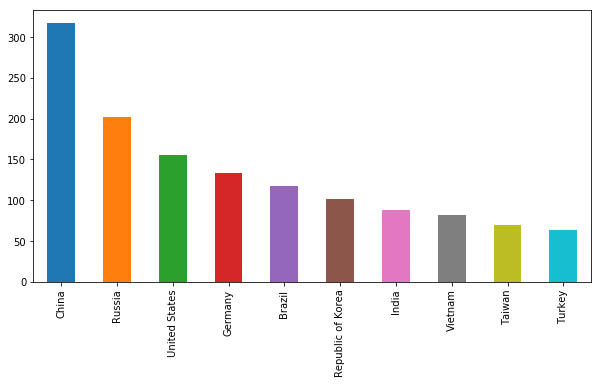

In [13]:
cow_list['country'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))